<h1 style = "font-size:3rem;color:DarkCyan">Train Classifier Model</h1>

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # for data importing
import sklearn # for training the model

In [123]:
# import the dataset (extracted features) saved in a .csv
dataset = pd.read_csv(r'dataset.csv')
dataset

,Unnamed: 0,sc,bw,sf,sr,zcr,rms,label,filename
0,0,1.798824,0.348337,-0.650937,1.103137,2.359166,-0.087440,0.0,clap00.wav
1,1,1.596986,1.284540,-0.455283,1.621357,1.448470,0.460283,0.0,clap01.wav
2,2,1.241764,0.983856,-0.582337,1.217733,1.530512,0.112806,0.0,clap02.wav
3,3,1.920064,0.897504,-0.481064,1.412264,2.719303,0.093284,0.0,clap03.wav
4,4,0.262470,-0.249038,-0.677210,0.038988,0.490405,-0.428324,0.0,clap04.wav
...,...,...,...,...,...,...,...,...,...
162,162,1.102880,0.973459,-0.551290,1.117861,1.413513,-0.314272,3.0,snare_37.wav
163,163,0.735877,0.711162,-0.601877,0.814952,0.905417,-0.293384,3.0,snare_38.wav
164,164,0.745683,0.924489,-0.628628,0.937689,0.223181,-0.347412,3.0,snare_39.wav
165,165,1.014002,1.034636,-0.603429,1.116316,0.660124,-0.320820,3.0,snare_40.wav


In [124]:
labels = np.array(dataset.label)
features = np.array([dataset.sc,dataset.bw, dataset.sf, dataset.sr, dataset.zcr, dataset.rms]).T
classes = ['clap','cymbal','kick','snare'] 

<h2 style = "font-size:2rem;color:DarkCyan"> Splitting dataset into training and test data</h2>

In [125]:
# split dataset using skylearn 
#Importing the tool, alternatively you can call sklearn.model_selection.train_test_split(..,..,..,)
from sklearn.model_selection import train_test_split

#splitting the dataset in training and testing parts - using 70 - 30 split
feat_train, feat_test, lab_train, lab_test = train_test_split(features, labels, test_size=0.3, random_state=14)
print(features.shape)
print(feat_train.shape)
print(feat_test.shape)

(167, 6)
(116, 6)
(51, 6)


<h2 style = "font-size:2rem;color:DarkCyan"> Creating Gaussian Naive Bayes classifier</h2>

In [126]:
from sklearn.naive_bayes import GaussianNB

model_GNB = GaussianNB()

<h2 style = "font-size:2rem;color:DarkCyan"> Train classifier</h2>

In [127]:
model_GNB.fit(feat_train, lab_train)

GaussianNB()

<h2 style = "font-size:2rem;color:DarkCyan"> Test classifier</h2>

In [128]:
lab_predict =  model_GNB.predict(feat_test)

#print the number of misclassified samples, accuracy and complete report (using scikit learn metric tools) 
print('Number of mislabeled samples %d out of %d' % ((lab_test != lab_predict).sum(),lab_test.size))
print('Accuracy:',sklearn.metrics.accuracy_score(lab_test, lab_predict))

Number of mislabeled samples 15 out of 51
Accuracy: 0.7058823529411765


<h2 style = "font-size:2rem;color:DarkCyan"> Performance Metrics</h2>

In [129]:
#computing a comprehensive set of performance metrics
print(sklearn.metrics.classification_report(lab_test, lab_predict))

print(sklearn.metrics.confusion_matrix(lab_test, lab_predict))

print("\nKappa score = ", sklearn.metrics.cohen_kappa_score(lab_test, lab_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.47      0.61        15
         1.0       0.67      0.67      0.67        12
         2.0       0.91      0.91      0.91        11
         3.0       0.55      0.85      0.67        13

    accuracy                           0.71        51
   macro avg       0.75      0.72      0.71        51
weighted avg       0.75      0.71      0.70        51

[[ 7  2  1  5]
 [ 0  8  0  4]
 [ 1  0 10  0]
 [ 0  2  0 11]]

Kappa score =  0.6088957055214723


In [108]:
#displaying names of misclassified files
results = lab_test == lab_predict

for idx in range(0,len(results)):
    if results[idx] == False:
        print(dataset.filename[idx])

clap02.wav
clap07.wav
clap09.wav
clap10.wav
clap11.wav
clap14.wav
clap17.wav
clap18.wav
clap20.wav
clap21.wav
clap23.wav
clap25.wav
clap26.wav
clap27.wav
clap28.wav
clap30.wav
clap37.wav
clap39.wav
clap40.wav
cymbal03.wav
cymbal04.wav
cymbal05.wav
cymbal06.wav
cymbal08.wav
cymbal11.wav
cymbal18.wav
cymbal19.wav
cymbal20.wav
cymbal23.wav
cymbal24.wav


<h2 style = "font-size:2rem;color:DarkCyan"> Visualizing Performance Matrix</h2>

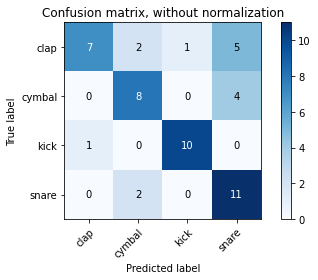

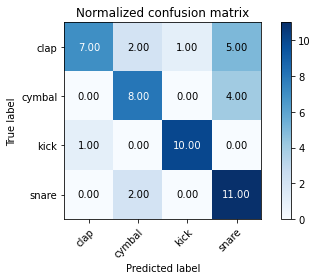

In [130]:
#this is a better way of visualizing the confusion matrix


#defining a function for the confusion matrix display 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#setting the precision to two digits after the decimal point
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(lab_test, lab_predict, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()